In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [3]:
# !pip install nltk

In [4]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

hyparameter to use

In [5]:
vocab_size = 5000
embedding_dim = 64
max_length = 300
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary 
training_portion = .8

### *  from the csv we are seperating the data with coma as labels and articles
    * replacing the stop words with ' '


In [6]:
articles = []
labels = []

with open('bbc-text.csv', 'r')as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(articles))
print(len(labels))

2225
2225


In [7]:
#articles[0]

In [8]:
labels[0]

'tech'

### splitting our data set to train&test

In [9]:
train_size  = int(len(articles) * training_portion)

In [10]:
train_size  = int(len(articles) * training_portion)

X_train = articles[0: train_size]
y_train = labels[0: train_size]

X_test = articles[train_size:]
y_test = labels[train_size:]

print(train_size)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1780
1780
1780
445
445


### using Tokenizer i will taking most 5000 common words from train_article(X_train)

In [11]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index


In [12]:
dict(list(word_index.items())[:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

In [13]:
print(X_train[9])

last star wars  children  sixth final star wars movie may suitable young children  film-maker george lucas said.  told us tv show 60 minutes revenge sith would darkest violent series.  think would take five six-year-old   told cbs programme  aired sunday. lucas predicted film would get us rating advising parents scenes may unsuitable under-13s. opens uk us 19 may. said expected film would classified pg-13 - roughly equivalent british 12a rating.  five previous star wars films carried less restrictive pg - parental guidance - ratings us. uk  passed u - suitable - exception attack clones  got pg rating 2002. revenge sith - third prequel original 1977 star wars film - chronicles transformation heroic anakin skywalker evil darth vader travels hell-like planet composed erupting volcanoes molten lava.  going watch make pact devil   lucas said.  film much dark  emotional. much tragedy.


#### this process clean up our text,lowercase and remove punctuations
#### After tokenization the next step is to turn those tokens to list of sequences

In [14]:
train_sequences = tokenizer.texts_to_sequences(X_train)

### this is 10th article that turn to sequence

In [15]:
print(train_sequences[9])

[12, 207, 2723, 283, 1968, 140, 207, 2723, 586, 46, 4116, 430, 283, 22, 1159, 1237, 4513, 2, 23, 9, 91, 58, 1144, 389, 1, 1, 4, 1, 1, 330, 59, 4, 38, 85, 99, 5, 100, 23, 4994, 345, 1, 324, 4513, 1039, 22, 4, 25, 9, 3273, 1, 1064, 3066, 46, 1, 2431, 1, 2569, 18, 9, 881, 46, 2, 94, 22, 4, 1, 1, 640, 1, 2973, 86, 1, 3273, 85, 488, 207, 2723, 319, 1824, 277, 1, 1, 1, 3792, 2724, 9, 18, 1907, 4735, 4116, 1, 715, 1, 166, 1, 3273, 601, 1, 1, 145, 1, 827, 1, 207, 2723, 22, 1, 1, 1, 1, 1, 4736, 1, 1, 1, 4737, 28, 1, 1, 1, 1, 1, 1, 52, 893, 21, 3392, 1, 4513, 2, 22, 53, 3168, 4117, 53, 3793]


### doing padding for article should be same size eg: if 200 < Adding zero / 200 > chopping data(truncate)

In [16]:
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [17]:
print(len(train_sequences[3]))
print(len(train_padded[3]))

275
300


In [18]:
# print(train_padded[3])

### padding to test articles

In [19]:
validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences, maxlen= max_length, padding = padding_type, truncating = trunc_type)

In [20]:
print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 300)


In [21]:
print(set(labels))

{'entertainment', 'sport', 'business', 'politics', 'tech'}


In [22]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)


training_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test))

In [23]:
print(training_label_seq[0])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq.shape)

[4]
(1780, 1)
[5]
(445, 1)


##### Exploring the article, 'Some words become 'OOV' because they did  not make to the top 5000(vocab_size)

In [28]:
reverse_word_index =  dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_article(train_padded[10]))

print('------------- * ----------------')
print(articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

In [32]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab size 5000, output embedding dim 64
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    
    # use RELU in place of tanh function since they are very good alternatives of each other
    tf.keras.layers.Dense(embedding_dim, activation = 'relu'),
    # we have 6 classes here so we are using softmax it will give the output layers into  probability distribution
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 493,510
Trainable params: 493,510
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [38]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs = num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
56/56 - 26s - loss: 1.4815 - accuracy: 0.3629 - val_loss: 0.9353 - val_accuracy: 0.6157
Epoch 2/10
56/56 - 24s - loss: 0.4686 - accuracy: 0.8202 - val_loss: 0.4816 - val_accuracy: 0.8337
Epoch 3/10
56/56 - 22s - loss: 0.1296 - accuracy: 0.9640 - val_loss: 0.3491 - val_accuracy: 0.9011
Epoch 4/10
56/56 - 22s - loss: 0.0348 - accuracy: 0.9916 - val_loss: 0.3362 - val_accuracy: 0.9034
Epoch 5/10
56/56 - 22s - loss: 0.0121 - accuracy: 0.9972 - val_loss: 0.4178 - val_accuracy: 0.8899
Epoch 6/10
56/56 - 23s - loss: 0.0081 - accuracy: 0.9978 - val_loss: 0.4507 - val_accuracy: 0.8966
Epoch 7/10
56/56 - 22s - loss: 0.0357 - accuracy: 0.9899 - val_loss: 0.4855 - val_accuracy: 0.8854
Epoch 8/10
56/56 - 20s - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.4280 - val_accuracy: 0.8899
Epoch 9/10
56/56 - 22s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.4694 - val_accuracy: 0.9034
Epoch 10/10
56/56 - 23s - loss: 0.0026 - accuracy: 0.9989 - val_loss: 0.4405 - val_accuracy: 0.9034


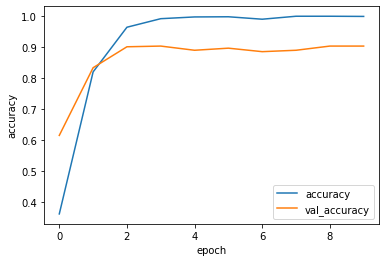

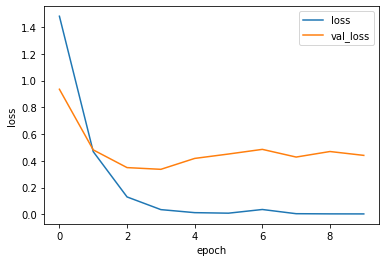

In [41]:
from matplotlib import pyplot as plt 

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.xlabel('epoch')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [48]:
txt = ['While both Li and Ng are currently applying AI to healthcare challenges, they believe that in the next few years they and their colleagues will still be in the experimentation stage. Progress will be “much slower than we wish over the next few years,” says Ng. “We are still figuring out the path to a human win,” agrees Li. For her, taking a “human-centered approach” is key to advancing the state of the art of AI in healthcare']
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen = max_length)
pred = model.predict(padded)

labels = ['sport', 'Business', 'politics', 'tech', 'Entertainment', 'Unknown']
print(labels[np.argmax(pred)])

Business
